#### [**Nicolas Cachanosky**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# SOLOW MODEL
---

These notes illustrate how to use code the Solow Model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the Solow Model. The note also assumes familiarity with economic concepts and a beginner experience with Python.

For a more complete and detailed discussion of Pythong applications see the material in [Quant Econ](https://quantecon.org/).


## CONTENT
1. The production function
2. Evolution of inputs

## 1. THE PRODUCTION FUNCTION

A neoclassical production function, $f(x_{i})$ where each $x_{i} \geq 0$, satisfies the Inada conditions: 

1. The production function has diminishing marginal returns: $\partial f(x)/\partial x > 0$ and $\partial^2/\partial x^2 <0$
2. If there is no input, there is no production: $f\left(x=0\right)=0$
3. As the value of the input approaches to zero, the first derivative approaches to infinity: $\lim\limits_{x \to 0^+} \partial f(x)/\partial x = +\infty $
4. As the value of the input approaches to infinity, the first derivative approaches to zero: $\lim\limits_{x \to +\infty} \partial f(x)/\partial x = 0^+$

Assume a Cobb-Douglas production function in discrete time $(t)$ with Hicks-neutral techonology $(A)$, and with constant returns to scale where $\alpha \in (0, 1)$ is the output elasticity of capital. 

\begin{equation*}
    Y_{t}\left(K_{t}, N_{t}\right) = A_{t} \cdot F\left(K_{t}, N_{t}\right) =  A_{t} \cdot \left(K_{t} ^{\alpha} N_{t}^{1-\alpha}\right)
\end{equation*}

The first and second derivatives are:

\begin{equation}
    \frac{\partial   Y_{t}}{\partial K}   = \alpha \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} 
  = \alpha \cdot \frac{Y_{t}}{K_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial K^2} = -\alpha (1-\alpha) \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} < 0
    \\
    \frac{\partial   Y_{t}}{\partial N}   = (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{\alpha} 
  = (1-\alpha) \cdot \frac{Y_{t}}{N_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial N^2} = -\alpha (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{1-\alpha} < 0
\end{equation}

Python can also calculate the derivatives for you. For this, Python needs two packages, 'numpy' and "sympy'. In addition, the result of the derivatino can be printed in LaTeX format. The example below calculates the first partial derivative of the output function with respect to capital and prints the output in Pythong and LaTeX formats.

In [5]:
"1|IMPORT PACKAGES"
import numpy as np
from sympy import Symbol
from sympy import latex

"2|TELL PYTHON TO TREAT VARIABLES AS 'MATH' SYMBOLS"
A, K, N, alpha = Symbol('A'), Symbol('K'), Symbol('N'), Symbol('alpha')  # Treat 'A', 'K', 'N', and 'alpha' as variables
Y = A * (K)**(alpha) * (N)**(1-alpha)                                    # Production function

"3|CALCULATE THE DERIVATIVE AND PRINT THE RESULT"
Yprime = Y.diff(K)   # Calculate the partial derivative with respect to K
print(Yprime)        # Print dY/dK
latex(Yprime)        # Print dY/dK in LaTeX format

A*K**alpha*N**(-alpha + 1)*alpha/K


'\\frac{A \\alpha}{K} K^{\\alpha} N^{- \\alpha + 1}'

---
The following code plots the level of output for changes in $K$ at different levels of $A$. The first part of the code imports the required packages. The second part of the code sets the parameter values and defines a user-defined (production) function. The third part of the code builds the graph. To be able to plot, Python needs the 'matplotlib' package.

Remember that Python numbers the first element of a vector 'V' with a zero. If the first element is 'a', then $V[0] = a$. The code sets the plot line to be a solid blue line ("b-") with some transparency set by the value of 'alpha'.

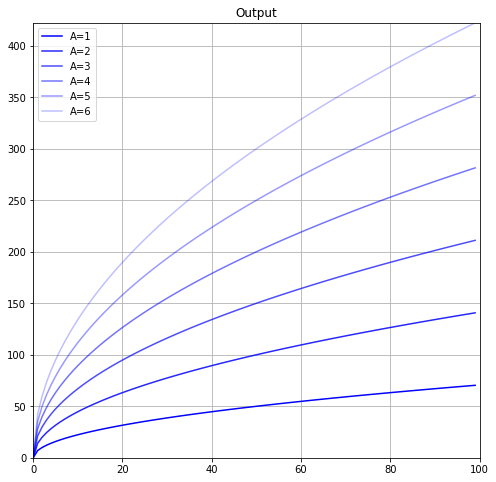

In [6]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
K_size = 100          # Model domain
A = 1                 # Total Factor Productivity
N = K_size/2          # Capital stock
alpha = 0.50          # Output elasticity of capital
K = np.arange(K_size) # Create empty array of K
Y = np.empty(K_size)  # Create empty array of Y

Y2 = np.empty(K_size) # Create empty arrays to be filled with output at different levels of A
Y3 = np.empty(K_size)
Y4 = np.empty(K_size)
Y5 = np.empty(K_size)
Y6 = np.empty(K_size)

def output(K, A):           # User-defined Cobb-Douglas Production Function
    Y = A * (K)**(alpha) * (N)**(1-alpha)    
    return Y

for i in range(0, K_size):  # Calculate output for each value of K in its domain
    Y[i]  = output(i, A)  
    Y2[i] = output(i, A+1)
    Y3[i] = output(i, A+2)
    Y4[i] = output(i, A+3)
    Y5[i] = output(i, A+4)
    Y6[i] = output(i, A+5)
    
Ymax = np.max(Y6)

"3|PLOT THE PRODUCTION FUNCTION FOR DIFFERENT VALUES OF TECHNOLOGY"
plot_label = '$Y=A \cdot K^{\\alpha}N^{1-\\alpha}$'
v = [0, K_size, 0, Ymax]                       # Set the range of the horizontal and vertical axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Output")
ax.grid()
ax.plot(K, Y,  "b-", alpha=1.00, label="A=1")
ax.plot(K, Y2, "b-", alpha=0.85, label="A=2")
ax.plot(K, Y3, "b-", alpha=0.70, label="A=3")
ax.plot(K, Y4, "b-", alpha=0.55, label="A=4")
ax.plot(K, Y5, "b-", alpha=0.40, label="A=5")
ax.plot(K, Y6, "b-", alpha=0.25, label="A=6")
ax.legend() 
plt.axis(v)                                    # Use 'v' as the range of the plot
plt.show()

---
## 2. STEADY STATE

To find the steady-state (equilibrum) of the Solow Model a motion function that tracks changes in capital is needed. Investment increases capital stock. Depreciation reduces the capital. When investment and depreciation are equal, capital stock does not change.

### 2.1 Investment

Invesmtnt $(I)$ is a fixed and exogenous savings rate $\left(s \in (0, 1) \right)$ of income:

\begin{equation}
I_{t} = s \cdot \left( A_{t} \cdot K_{t}^{\alpha} N_{t}^{1-\alpha} \right) = s \cdot Y_{t}
\end{equation}

Since income increases at a decreasing rate with capital, so does investment, which is a fixed proportion of income.

### 2.2 Depreciation

The amount of depreciation is a fixed rate $\left(d \in (0, 1) \right)$ of the capital stock:

\begin{equation}
D_{t} = d \cdot K_{t}
\end{equation}

Note that while investment increases at a decreasing rate, depreciatin increaes at constant rate $d$. The difference between income and investment is consumption.

\begin{equation}
C_{t} = Y_{t} - s \cdot \left(A_{t} \cdot K_{t}^{\alpha} N_{t}^{1-\alpha} \right) = Y_{t} - I_{t}
\end{equation}

---



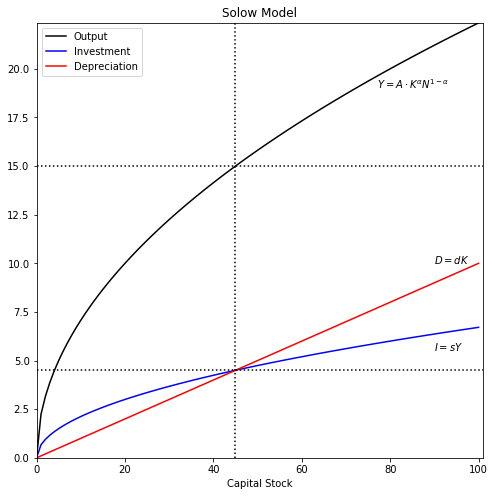

In [2]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
K_size = 101          # Model domain
A = 1                 # Total Factor Productivity
N = 5                 # Capital stock
alpha = 0.50          # Output elasticity of capital
s = 0.30              # Savings rate
d = 0.10              # Depreciation rate
K = np.arange(K_size) # Create empty array of K
Y = np.empty(K_size)  # Create empty array of Y
D = np.empty(K_size)  # Create empty array of D
I = np.empty(K_size)  # Create empty array of I
C = np.empty(K_size)  # Create empty array of C

"3|DEFINE FUNCTIONS"
def output(K):   # Cobb-Douglas Production Function
    Y = A * (K)**(alpha) * (N)**(1-alpha)    
    return Y
   
"4|POPULATE ARRAYS"
for i in range(0, K_size):
    Y[i] = output(i)    # Production function
    D[i] = d*K[i]                                # Depreciation
    I[i] = s*Y[i]                                # Investment
    
Ymax = np.max(Y)

"5|CALCULATE STEADY-STATE VALUES"
Kstar = ((s*A*(N)**(1-alpha))/d)**(1/(1-alpha))
Ystar = A  *(Kstar**alpha)*((N)**(1-alpha))
Istar = s*Ystar
Cstar = Ystar - Istar
Dstar = d*Kstar

"6|PLOT THE SOLOW MODEL"
v = [0, K_size, 0, Ymax]
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(K, Y, "k", ls = '-', label="Output")
ax.plot(K, I, "b", ls = '-', label="Investment")
ax.plot(K, D, "r", ls = '-', label="Depreciation")
ax.set(title="Solow Model", xlabel="Capital Stock")
plt.text(77, 19,  r'$Y = A \cdot K^{\alpha} N^{1-\alpha}$')
plt.text(90, 10,  r'$D = dK$')
plt.text(90, 5.5, r'$I = sY$')
plt.legend(loc=2)
plt.axvline(x = Kstar, ymin = 0, ymax = Ystar/Y[N-1], ls = ":", color = 'k')
plt.axhline(y = Istar, xmin = 0, xmax = Kstar/N,      ls = ":", color = 'k')
plt.axhline(y = Ystar, xmin = 0, xmax = Kstar/N,      ls = ":", color = 'k')
plt.axis(v)
plt.show()

---
Since the production function has constant returns to scale, we can express $Y$ in *per* effective unit of labor.

\begin{align}
  y_{t} &= \frac{Y_{t}}{A_{t}N_{t}}                                                                                          \\
  y_{t} &= \frac{A_{t} \cdot \left(K_{t}^{\alpha}N_{t}^{(1-\alpha)} \right)}{A_{t}N_{t}}                                     \\
  y_{t} &= \frac{A_{t}}{A_{t}} \cdot \left(\frac{K_{t}}{N{t}}\right)^{\alpha} \left(\frac{N_{t}}{N_{t}}\right)^{(1-\alpha)}  \\
  y_{t} &= k_{t}^{\alpha}                                                                                                    \\
  y_{t} &=f( k_{t} )                                                                                                         \\
\end{align}

